In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('card_transdata.csv')

<AxesSubplot: >

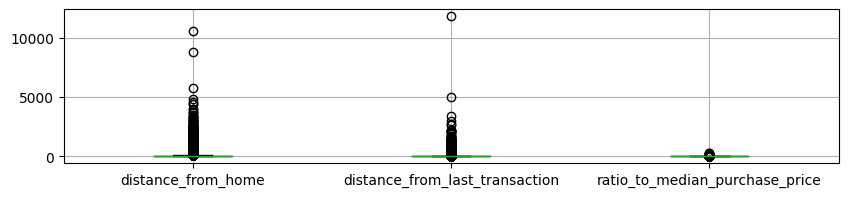

In [31]:
data.iloc[:,:3].boxplot(figsize=(10,2))

In [27]:
from sklearn.preprocessing import StandardScaler
cols_num = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
scaler = StandardScaler()
for col in cols_num:
    data[col+'_log'] = np.log(data[col])

In [47]:
cols_X = ["distance_from_home_log", 
          "distance_from_last_transaction_log", 
          "ratio_to_median_purchase_price_log", 
          "repeat_retailer", 
          "used_chip", 
          "used_pin_number", 
          "online_order"]
col_y = ["fraud"]

In [63]:
score = dict()
score["model"] = []
score["recall"] = []
score["precision"] = []
score["f1"] = []
score["accuracy"] = []
score["auc"] = []
from sklearn.model_selection import train_test_split
X = data[cols_X].to_numpy()
y = data[col_y].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=539)

#### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

y_test_pred_log = log_reg.predict(X_test)
y_test_pred_prob_log = log_reg.predict_proba(X_test)

score["model"].append("Logistic Regression")
score["recall"].append(recall_score(y_test, y_test_pred_log))
score["precision"].append(precision_score(y_test, y_test_pred_log))
score["f1"].append(f1_score(y_test, y_test_pred_log))
score["accuracy"].append(accuracy_score(y_test, y_test_pred_log))
score["auc"].append(roc_auc_score(y_test, y_test_pred_prob_log[:, 1]))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


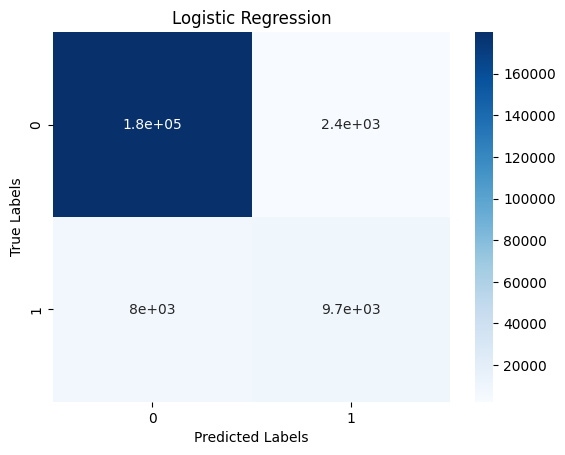

In [98]:
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred_log)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the plot title and labels
plt.title('Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('log.png')
plt.show()

#### Naive Baysian Classifier

In [65]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

y_test_pred_nb = nb.predict(X_test)
y_test_pred_prob_nb = nb.predict_proba(X_test)

score["model"].append("Naive Baysian Classifier")
score["recall"].append(recall_score(y_test, y_test_pred_nb))
score["precision"].append(precision_score(y_test, y_test_pred_nb))
score["f1"].append(f1_score(y_test, y_test_pred_nb))
score["accuracy"].append(accuracy_score(y_test, y_test_pred_nb))
score["auc"].append(roc_auc_score(y_test, y_test_pred_prob_nb[:, 1]))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


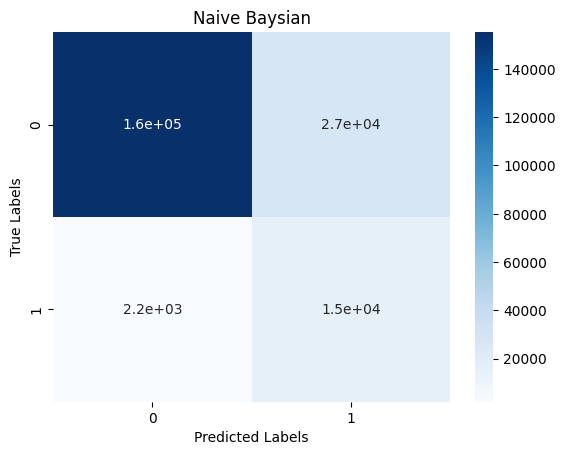

In [99]:
cm = confusion_matrix(y_test, y_test_pred_nb)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the plot title and labels
plt.title('Naive Baysian')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('nb.png')
plt.show()

#### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=203)
clf_tree.fit(X_train, y_train)

y_test_pred_clf = clf_tree.predict(X_test)
y_test_pred_prob_clf = clf_tree.predict_proba(X_test)

score["model"].append("Decision Tree Classifier")
score["recall"].append(recall_score(y_test, y_test_pred_clf))
score["precision"].append(precision_score(y_test, y_test_pred_clf))
score["f1"].append(f1_score(y_test, y_test_pred_clf))
score["accuracy"].append(accuracy_score(y_test, y_test_pred_clf))
score["auc"].append(roc_auc_score(y_test, y_test_pred_prob_clf[:, 1]))

In [42]:
confusion_matrix(y_test,y_test_pred_clf)

array([[182361,      1],
       [     4,  17634]])

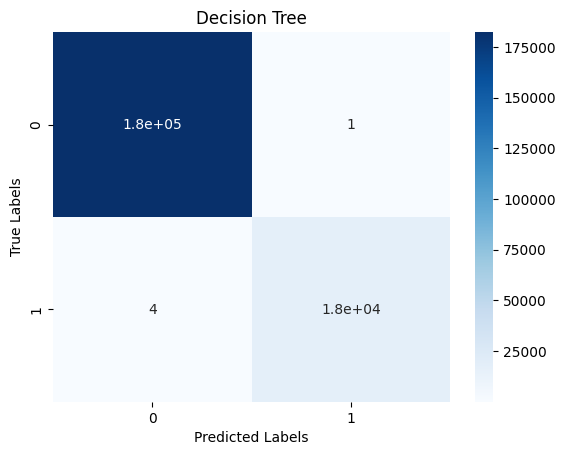

In [100]:
cm = confusion_matrix(y_test, y_test_pred_clf)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the plot title and labels
plt.title('Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('clf.png')
plt.show()


#### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=111)
rf.fit(X_train, y_train)

y_test_pred_rf = rf.predict(X_test)
y_test_pred_prob_rf = rf.predict_proba(X_test)

score["model"].append("Random Forest")
score["recall"].append(recall_score(y_test, y_test_pred_rf))
score["precision"].append(precision_score(y_test, y_test_pred_rf))
score["f1"].append(f1_score(y_test, y_test_pred_rf))
score["accuracy"].append(accuracy_score(y_test, y_test_pred_rf))
score["auc"].append(roc_auc_score(y_test, y_test_pred_prob_rf[:, 1]))

/var/folders/yr/bk0ryhxn7mz24f92r4gk1jrh0000gp/T/ipykernel_89516/2964624450.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [44]:
confusion_matrix(y_test,y_test_pred_rf)


array([[182361,      1],
       [     1,  17637]])

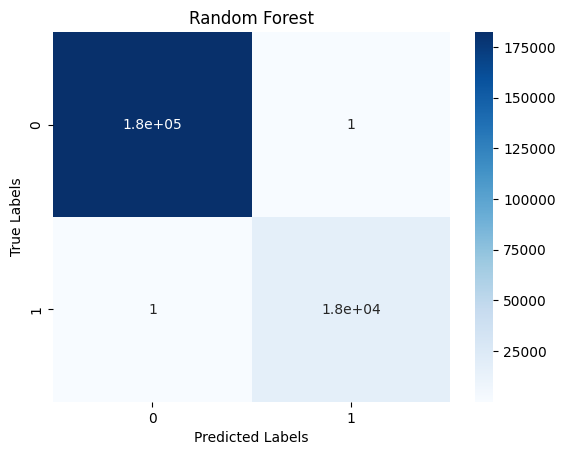

In [101]:
cm = confusion_matrix(y_test, y_test_pred_rf)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the plot title and labels
plt.title('Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('rf.png')
plt.show()


In [83]:
res.T

,0,1,2,3
model,Logistic Regression,Naive Baysian Classifier,Decision Tree Classifier,Random Forest
recall,0.548361,0.873739,0.999773,0.999943
precision,0.802989,0.36182,0.999943,0.999943
f1,0.651686,0.51173,0.999858,0.999943
accuracy,0.948305,0.852955,0.999975,0.99999
auc,0.940497,0.935776,0.999884,1.0


                      model    recall  precision        f1  accuracy       auc
0       Logistic Regression  0.548361   0.802989  0.651686  0.948305  0.940497
1  Naive Baysian Classifier  0.873739   0.361820  0.511730  0.852955  0.935776
2  Decision Tree Classifier  0.999773   0.999943  0.999858  0.999975  0.999884
3             Random Forest  0.999943   0.999943  0.999943  0.999990  1.000000


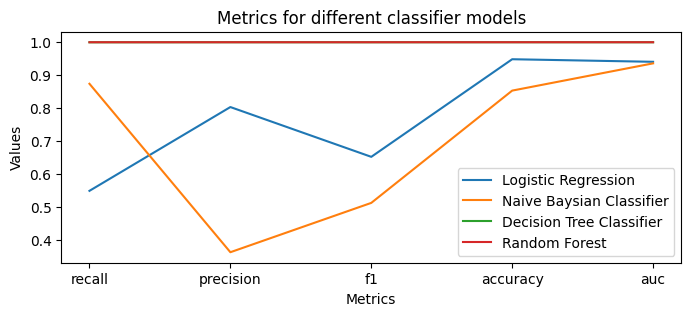

In [84]:
print(res.head())
plt.figure(figsize=(8,3))
for i in range(len(res)):
    plt.plot(res.iloc[i,1:])
plt.legend(res['model'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Metrics for different classifier models')
plt.show()

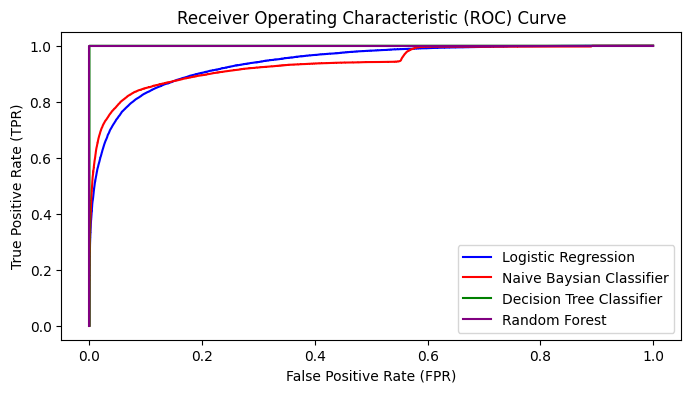

In [110]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_test_pred_prob_log[:, 1])
auc_log = auc(fpr_log, tpr_log)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_test_pred_prob_nb[:, 1])
auc_nb = auc(fpr_nb, tpr_nb)

fpr_clf, tpr_clf, _ = roc_curve(y_test, y_test_pred_prob_clf[:, 1])
auc_clf = auc(fpr_clf, tpr_clf)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_prob_rf[:, 1])
auc_rf = auc(fpr_rf, tpr_rf)
# Plot the ROC curves for each model
plt.figure(figsize=(8,4))
plt.plot(fpr_log, tpr_log, color='blue', label='Model 1 (AUC = %0.2f)' % auc_log)
plt.plot(fpr_nb, tpr_nb, color='red', label='Model 2 (AUC = %0.2f)' % auc_nb)
plt.plot(fpr_clf, tpr_clf, color='green', label='Model 3 (AUC = %0.2f)' % auc_clf)
plt.plot(fpr_rf, tpr_rf, color='purple', label='Model 4 (AUC = %0.2f)' % auc_rf)

# Set the plot title and labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(res['model'],loc='lower right')
plt.savefig('roc.png')
# Show the plot
plt.show()

In [11]:
# Preprocessing for KNN
X = data[:, :-1]
y = data[:, -1]
from sklearn.model_selection import train_test_split,cross_val_score
import sklearn.metrics as metrics
# splitting data into training/testing

# TODO: downsample the data so that fraud is an equally likely outcome
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Use 5-fold cross validation to find the best k value
from sklearn.neighbors import KNeighborsClassifier
k_values = list(range(1, 31))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[cv_scores.index(max(cv_scores))]
print("Best k:", best_k)

# Use the best K found the the previous step to fit a KNN model
knn = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Evaluate performance of KNN classifier
print("P(classification) =", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Best k: 1
P(classification) = 0.986125
Confusion matrix: 
 [[180811   1683]
 [  1092  16414]]


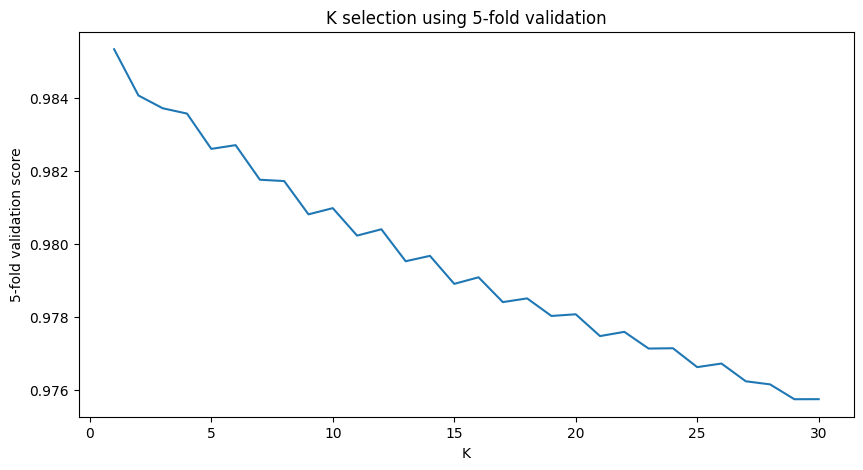

In [19]:
cv_scores = pd.Series(cv_scores,index= range(1,31))
plt.figure(figsize=(10,5))
plt.plot(cv_scores)
plt.xlabel('K')
plt.ylabel('5-fold validation score')
plt.title('K selection using 5-fold validation')
plt.savefig('K_selection.png')
plt.show()

In [20]:
metrics.recall_score(y_test, y_pred)

0.9376213869530446